<a href="https://colab.research.google.com/github/NivinyaSamarutilake/Sign-Language-Translator/blob/main/CS3282_Sign_Language_Translator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""Import the necessary libraries"""

import matplotlib.pyplot as plt
# import matplotlib.image as img
import cv2
import numpy as np
# import PIL
# import tensorflow as tf
# import pandas as pd
import os
import string

# from tensorflow import keras
# from keras import layers
# from keras.models import Sequential

In [ ]:
# To check if GPU is active
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 299248944641482525
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4280684837129411946
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
path_to_folder = '../content/drive/MyDrive/dataset/asl_alphabet_train/asl_alphabet_train'

characters = list(string.ascii_uppercase) + ['del', 'nothing', 'space']

dataset_np = np.empty([87000, 3073])

_,dirs,_ = next(os.walk(path_to_folder))

count = 0
for i in dirs:
  path = os.path.join(path_to_folder, i)
  files = np.asarray(os.listdir(path))

  for j in files:
    file_path = os.path.join(path, j)

    # read the image at file_path
    imageMat = cv2.imread(file_path)
    imageMat_resized = cv2.resize(imageMat, (32,32))

    # The images are RGB - therefore 400,000 x 3 values are there
    # Let's reshape it from 3D matrix to 1D matrix
    imageMat_flat = imageMat_resized.ravel()

    # Insert the label of the image at 0th index
    imageMat_flat = np.insert(imageMat_flat, 0, characters.index(i))

    # Append to the above np array
    dataset_np[count] = imageMat_flat
    print('Image added : ', j)
    count += 1

print(dataset_np.shape)
print(dataset_np[9])
print(dataset_np[990])
print(dataset_np[21830])
print(dataset_np[86999])

Image added :  A2628.jpg
Image added :  A2712.jpg
Image added :  A2853.jpg
Image added :  A2788.jpg
Image added :  A2630.jpg
Image added :  A2786.jpg
Image added :  A2862.jpg
Image added :  A2798.jpg
Image added :  A284.jpg
Image added :  A2855.jpg
Image added :  A2781.jpg
Image added :  A2811.jpg
Image added :  A270.jpg
Image added :  A2787.jpg
Image added :  A2883.jpg
Image added :  A2774.jpg
Image added :  A2808.jpg
Image added :  A2697.jpg
Image added :  A2645.jpg
Image added :  A2815.jpg
Image added :  A2852.jpg
Image added :  A2675.jpg
Image added :  A2694.jpg
Image added :  A279.jpg
Image added :  A2723.jpg
Image added :  A2717.jpg
Image added :  A2681.jpg
Image added :  A2685.jpg
Image added :  A2736.jpg
Image added :  A2744.jpg


KeyboardInterrupt: ignored

In [ ]:
"""Get np arrays for all batches. Split each array into train, validation and test sets.
   Append those sets into a larger sets which contain all train, validation and test sets.
   Dataset will be split 70% training, 15% validation and 15% testing. """

from sklearn.model_selection import train_test_split

# batch_file = 'Batch2.txt'
# batch_data = get_batch_nparray(batch_file)
X_train = dataset_np[:, 1:] / 255
y_train = dataset_np[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = 12345)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.22222, random_state = 12345)

print(len(X_train))
print(len(X_validate))
print(len(X_test))

60900
17400
8700


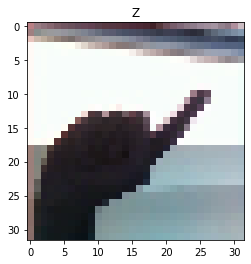

In [ ]:
"Visualize data into image"
def visualize_data(num, belonging_set_X, belonging_set_y):
  matrix = belonging_set_X[num]*255
  matrix_rshp = matrix.reshape((32,32,3))
  plt.imshow(matrix_rshp.astype('uint8'))
  label = characters[int(belonging_set_y[num])]
  plt.title(label)
  return

visualize_data(3567, X_train, y_train)

In [ ]:
"""Read the csv file for dataset
    This code creates RAM overflow. Not efficient."""
df = pd.read_csv('../content/drive/MyDrive/csv_dataset.csv')
print(df.shape)

In [ ]:
"""Reshape the test, train and validation sets"""
# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(32, 32, 3))
X_test = X_test.reshape(X_test.shape[0], *(32, 32, 3))
X_validate = X_validate.reshape(X_validate.shape[0], *(32, 32, 3))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)


(60900, 32, 32, 3)
(60900,)
(17400, 32, 32, 3)


In [ ]:
"""Base CNN model"""

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (32, 32, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (32, 32, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (32, 32, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(1024, activation='relu'))
cnn_model.add(Dense(29, activation='softmax'))

#CNN Model Summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 15, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/15
1904/1904 [==============================] - 140s 73ms/step - loss: 1.3735 - accuracy: 0.5644 - val_loss: 0.4069 - val_accuracy: 0.8556
Epoch 2/15
1904/1904 [==============================] - 129s 68ms/step - loss: 0.4688 - accuracy: 0.8384 - val_loss: 0.1573 - val_accuracy: 0.9551
Epoch 3/15
1904/1904 [==============================] - 134s 70ms/step - loss: 0.3157 - accuracy: 0.8897 - val_loss: 0.0930 - val_accuracy: 0.9701
Epoch 4/15
1904/1904 [==============================] - 131s 69ms/step - loss: 0.2473 - accuracy: 0.9139 - val_loss: 0.0722 - val_accuracy: 0.9772
Epoch 5/15
1904/1904 [==============================] - 130s 68ms/step - loss: 0.2123 - accuracy: 0.9262 - val_loss: 0.0459 - val_accuracy: 0.9857
Epoch 6/15
1904/1904 [==============================] - 134s 70ms/step - loss: 0.1826 - accuracy: 0.9367 - val_loss: 0.0379 - val_accuracy: 0.9875
Epoch 7/15
1904/1904 [==============================] - 129s 68ms/step - loss: 0.1662 - accuracy: 0.9427 - val_loss: 0

Text(0.5, 1.0, 'Accuracy evolution')

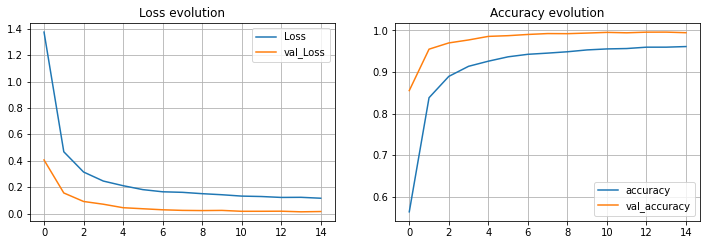

In [ ]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [ ]:
#Predictions for the test data
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

predictions = cnn_model.predict(X_test)
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)


print('Test accuracy:', test_acc)
print('Test loss:', test_loss)
# print('Test precision: ', test_precision)
# print('Recall: ', recall_m(y_test, predictions))
# print(classification_report(y_test, predictions))

272/272 [==============================] - 5s 18ms/step
Test accuracy: 0.9942528605461121
Test loss: 0.018609102815389633


In [ ]:
keras.models.save_model(cnn_model, 'model.pbtxt')
converter = tensorflow.lite.TFLiteConverter.from_keras_model(model=cnn_model)
model_tflite = converter.convert()
open('signLanguageRecognitionModel.tflite', 'wb').write(model_tflite)

In [ ]:
tf.keras.utils.plot_model(cnn_model, to_file='model.png', show_shapes=True, show_dtype=False,show_layer_names=True, rankdir='TB', expand_nested=False, dpi=72,layer_range=None, show_layer_activations=False)


NameError: ignored